In [1]:
!pip install python-binance

In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [10]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

bot = Binance(
    API_KEY='5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN',
    API_SECRET='XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'
)

In [3]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
{'apikey': 'EvnNm9TKqsC2p48HsCdApx7c0UHgFLXByOL6hPjWIKeLS8TvOifSvZnqEa6mniWI', 'apisecret': 'r1j02rVBir11OKOVeiPe2LvJ8klDC6bm3NSjNfNJSMKkwiTHc6iix2om4fbsIaOf'},
{'apikey': '5b8N0xhQnCl8sX8On8fn5eZHLrhZTlEXu9VqzV62HI7ckR3M44yA5YFX1Yv2ayiN', 'apisecret': 'XZMcjJb6cHBryw8TPFWTTX71G10m7KIxuv86ZiWmaYmGvNwlKfo2NyTOMUsmLAAz'},
{'apikey': 'XEWksNXgijYkBfokp9Nnq2aBbS8VtaKRBXr15bebFAUx99q2KI2xhi75NNM7yms4', 'apisecret': 'fUO81kg0bKL4Ig1p7kqih2eW25XjnGD0soPTUbMt2riMZv0YAr1LDoPeynJENcA7'},
{'apikey': 'LbsKC75PVp12pPaxpUzctmO5IxIEUdX3bLqpQAbkzslFwbL2c64Mt4sJUjqQMSgr', 'apisecret': 'ScyapZew18D8cTncyrVocaBevr4M0WPmBG8K0ACgJ2XFCDMxevItzQdS9VN2uYmC'},
{'apikey': 'PWUrujIHQsQPMlm2nTQwAwqDy3eVVFpXQJ8jOWbEBnqjhoSGCr5F1m2rYUDRWaSY', 'apisecret': 'SMtNYX9fg3fEPZUuKYhHHKB3mbatfH7WwjqblmKuItglTKlou0XJR607tccoXFyu'},
{'apikey': 'mkPWLpmy8MCDvx1xiZzRaHwkz8MlYyYQynHcsKCbnNsCLG4IUv2RK03ndPrJKT3B', 'apisecret': 'TWtchKvd32ok72kJddHRmllaX4x8Ad2PmInIKHkRZgV3YDj6YjJSzYXosedUh1AU'},
{'apikey': '5JJHdFEUAflZNKxvPXYgLfsMiGPxjxKlYD4HEMx5aihaRBgAETw4rV0jnAEGm5dh', 'apisecret': 'T5R22DoslDUbN7ORjML3sRLR6lSzm5I3SwXaErhT5MbdCMe4NpIJbF7kGrsacl0T'},
{'apikey': 'Iq1xfyElTdk3velugqvaVp1aiAWbAcxyQLs2DzHJySTZCNeMQP243tiQGdoUhCl7', 'apisecret': '8zKsD55iPxy5ND6AFukxEUqK8PcMLatdXG7scG8HWgomPBQOtRoZSFvjALgrT3Ew'},
{'apikey': 'Iab3YDpTeSLo9xSMSLKnoZStZ1R23uVn4eikCrelCgtzPytVfHSMPZPB6woXQJuF', 'apisecret': 'hxjOl74MI6UAA3WyTa8hcWjenFS3kKa5IkYNzM9r5DHCyjE3a0gXhqLZJGP4kcG3'},
{'apikey': 'UQrazVFv3aAOdd6zCyRf5RvjjQRrxUBg3qxy7t8Eru9qkQdDGYUhiYergXqOxe9g', 'apisecret': 'n5uXrojJxtyI5xq8L7IHAPCFx4ldYy1z4hcoY4tzf3Od74e9NJCDV00WPmyZcyxG'},
{'apikey': 'lzarzgM9sE6qbUove5X0Gqu9lQn7HNz820GF6ZgeqKRNEmjmBUZYOYQlMWtLuj1q', 'apisecret': 'Q8CxToI8rk6DJMlesarKxLDs8w3TH6XqhSaguJaL60BnRxzapgbKhXEJzrxvK4fW'},
{'apikey': '7RHAc0yqJGTSGbnxIiZZa1xm9YKxa0gFpJU0bkcSaGn2OaaWm9xfdhPbNRa2A8sS', 'apisecret': 'paJc7wlu34QGufetvR77WQDblHzhHYgA8NX8m6tpkwU3xW2ssJ2q7ODxNI3TcjUv'},
{'apikey': 'pZ1trU1ahK8fcykT29rpkATMT4sTdFQgGzruqLW09g4c4bsveYRF8sANpgc78Gz9', 'apisecret': 'pWOT5QrGJ8dcYdXChL3aMyG1GPVxtC5zxmTXFPEvRpl9Vyrmrt0hUqcelDkKYY2d'}
]

In [11]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [12]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['OMGUSDT', 'SNXUSDT']


In [4]:
_LIMIT_ = 1000
_SYMBOL_ = 'ZECUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [5]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

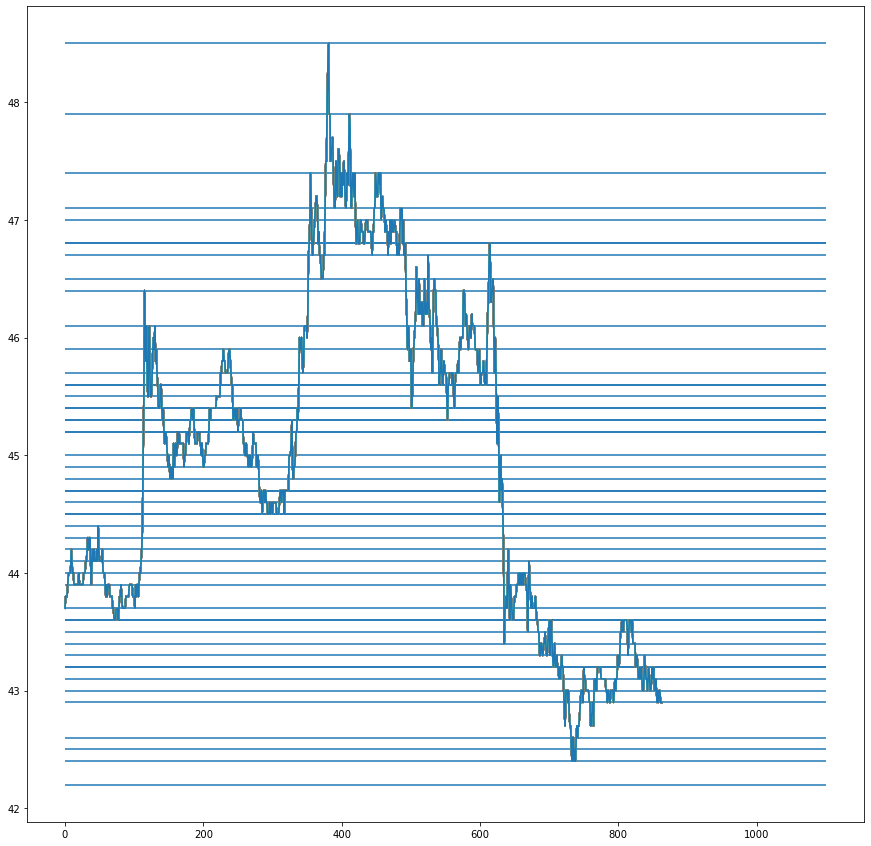

In [9]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [6]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
#print(counter_max_min)
print(close_max_min)

[44.3, 44.3, 44.3, 44.4, 45.2, 44.2, 44.5, 45.1, 45.4, 45.4, 44.6, 44.6, 44.6, 44.8, 44.7, 45.0, 45.2, 45.4, 45.4, 45.2, 45.4, 45.6, 47.6, 48.1, 48.6, 48.1, 48.2, 47.8, 47.5, 47.9, 48.1, 48.4, 48.0, 47.0, 47.0, 47.3, 43.6, 43.8, 43.7, 43.5, 44.1, 43.9, 44.0, 44.4, 44.7, 44.2, 44.1, 44.1, 44.3, 44.2, 43.5, 43.6, 44.7, 44.5, 44.7, 44.7, 44.4, 44.9, 44.6, 47.5, 47.5, 47.4, 47.1, 47.0, 46.9, 46.5, 47.6, 47.5, 46.8, 46.3, 45.9, 46.4]


In [11]:
df=pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный'])
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный


In [7]:
def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*taker*lots+float(deductible)*maker*lots)
    return profit
 
def start_sum_calculate(reduced, deductible, start_sum, lots, taker, maker):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*taker*lots+float(deductible)*maker*lots)+start_sum
    return start_sum
 
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker):#Пробой asks и отcкок bids
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, taker, maker)
    start_sum = start_sum_calculate(end, start, start_sum, lots, taker, maker)
    return profit, start_sum, right_answer, false_answer
    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, taker, right_answer, false_answer, start_sum, maker): #Пробой bids и отcкок asks
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, taker, maker)
    start_sum = start_sum_calculate(start, end, start_sum, lots, taker, maker)
    return profit, start_sum, right_answer, false_answer

In [ ]:
#Поменять обратно значения profit, true, false, sum

In [49]:
bids_list_vol=[]
for j in glass['bids']:
    bids_list_vol.append(j[1])
bids_list_vol = np.array(bids_list_vol).astype(np.float)
a = np.mean(bids_list_vol)*how_more_mean_vol
a

64370.201999999976

In [9]:
i=0
profit=0
start_sum=20
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
maker=0.000162
taker=0.000324
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        
        if float(last_price['lastPrice']) == nearest_close_max and nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_close_min and nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, taker, right_answer, false_answer, start_sum, maker)
            set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_asks:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, taker, right_answer, false_answer, start_sum, maker)
            set(asks).remove(nearest_asks)

        if i%15==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

Работаем на отскок buy asks 43.80000000
Закрылись по стопу sell asks 43.90000000
Ошибка: name 'df' is not defined


KeyboardInterrupt: 

In [15]:
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный
0,ZECUSDT,отскок,asks,43.00000000,2023-02-14 07:16:58,42.90000000,2023-02-14 07:21:40,True
1,ZECUSDT,отскок,bids,42.90000000,2023-02-14 07:21:44,43.00000000,2023-02-14 07:22:12,True
2,ZECUSDT,отскок,bids,42.90000000,2023-02-14 07:22:38,43.00000000,2023-02-14 07:22:45,True
3,ZECUSDT,отскок,asks,43.10000000,2023-02-14 07:25:05,43.20000000,2023-02-14 07:29:44,False
4,ZECUSDT,пробой,bids,43.20000000,2023-02-14 07:29:48,43.10000000,2023-02-14 07:29:49,True
...,...,...,...,...,...,...,...,...
1687,ZECUSDT,отскок,bids,44.10000000,2023-02-15 21:43:26,44.20000000,2023-02-15 21:44:14,True
1688,ZECUSDT,отскок,asks,44.20000000,2023-02-15 21:44:15,44.10000000,2023-02-15 21:44:26,True
1689,ZECUSDT,отскок,bids,44.10000000,2023-02-15 21:44:30,44.20000000,2023-02-15 21:44:49,True
1690,ZECUSDT,отскок,asks,44.20000000,2023-02-15 21:44:50,44.10000000,2023-02-15 21:45:52,True


In [16]:
df.to_csv (r'scalping_bot_version3_3.csv', index= False)

In [6]:


# def time_checking(start, type_operation):
#     if last_price['lastPrice']==start:
#         end=last_price['lastPrice']
#         print('Закрылись по времени', f'sell {type_operation}', end)
#         false_answer+=1
#     return end

def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum
#Пробой asks и отcкок bids
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, _SYMBOL_):
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start, 'Монета:', _SYMBOL_)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            false_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            right_answer+=1
#             timer.cancel()
            break
        
#         end=time_checking(start, type_operation)
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

#Пробой bids и отcкок asks    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, _SYMBOL_): 
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start, 'Монета:', _SYMBOL_)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()        
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            right_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end, 'Монета:', _SYMBOL_)
            false_answer+=1
#             timer.cancel()
            break
    
#         end=time_checking(start, type_operation)
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    

In [7]:
profit=0
start_sum=700
right_answer=0
false_answer=0
# new_coin_list.append('RLCUSDT')
new_coin_list.append('WAVESUSDT')
count_of_coins=len(new_coin_list)
#, bot_number, start_sum, profit, right_answer, false_answer   
def the_final_function(_SYMBOL_, start_sum, profit, right_answer, false_answer):
    i=0
    #lots=10
    how_more_mean_vol=3
    stop_loss=0.001
    take_profit=0.002
    bot_number=0
    commission=0.000162
#     close_max_copy=close_max.copy()
#     close_min_copy=close_min.copy()
    BOT_LIST = client_create(_API_LIST_)
    while True:
        try:
            i+=1
            if bot_number == 12:
                bot_number = 0
            bot_number+=1
            bids=[]
            asks=[]
            glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            bids_list_vol=[]

            for j in glass['bids']:
                bids_list_vol.append(j[1])
            bids_list_vol = np.array(bids_list_vol).astype(np.float)
            a = np.mean(bids_list_vol)*how_more_mean_vol
            for u in glass['bids']:
                if float(u[1])>a:
                    bids.append(u[0])
            for f in glass['asks']:
                if float(f[1])>a:
                    asks.append(f[0])

            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            last = last_price['lastPrice']
            bids = np.array(bids).astype(np.float)
            asks = np.array(asks).astype(np.float)
            nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
            nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
#             nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
#             nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            lots=start_sum/float(last_price['lastPrice'])
    #         if float(last_price['lastPrice']) == nearest_close_max:
    #             profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)

    #         last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    #         lots=start_sum/float(last_price['lastPrice'])
    #         if float(last_price['lastPrice']) == nearest_close_min:
    #             profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)

            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            lots=start_sum/float(last_price['lastPrice'])
            if float(last_price['lastPrice']) == nearest_bids:
                profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, new_coin_list[n])
                list(bids).clear()
    #             set(bids).remove(nearest_bids)            

            last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
            lots=start_sum/float(last_price['lastPrice'])
            if float(last_price['lastPrice']) == nearest_asks:
                profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum, BOT_LIST, bot_number, stop_loss, take_profit, new_coin_list[n])
                list(asks).clear()
    #             set(asks).remove(nearest_asks)

            if i%15==0:
                list(bids).clear()
                list(asks).clear()
            print('Монета:', _SYMBOL_)
            print('Заработали:', profit, 'Монета:', _SYMBOL_)
            print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer, 'Монета:', _SYMBOL_)
            print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots, 'Монета:', _SYMBOL_)
        except Exception as err:
            print('Ошибка:', err)
            
for n in range(count_of_coins):
    start_new_thread(the_final_function, (new_coin_list[n], start_sum, profit, right_answer, false_answer,))
# the_final_function(_SYMBOL_)

Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.7528259231349 Монета: WAVESUSDT
Работаем на отскок buy asks 2.65400000 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.4757863205192 Монета: RLCUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.4757863205192 Монета: RLCUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUS

Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.76805356288855 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.8250874562719 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.65348399246705 Монета: WAVESUSDT
Работаем на отскок buy bids 2.65500000 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.8250874562719 Монета: RLCUSDT
Работаем на отскок buy asks 2.65700000 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 

Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.6503496503497 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 413.4672179562906 Монета: OMGUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.25686348251224 Монета: WAVESUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правиль

Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.25686348251224 Монета: WAVESUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 413.4672179562906 Монета: OMGUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.25686348251224 Монета: WAVESUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVE

Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.25686348251224 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 413.22314049586777 Монета: OMGUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.25686348251224 Монета: WAVESUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.9282296650718 Монета: BANDUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUS

Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.76805356288855 Монета: BANDUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.1578947368421 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 412.24970553592465 Монета: OMGUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.76805356288855 Монета: BANDUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.1578947368421 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUS

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.6503496503497 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 413.7115839243499 Монета: OMGUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.6080305927342 Монета: BANDUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.1578947368421 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.30139720558884 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных 

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.30139720558884 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 413.4672179562906 Монета: OMGUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.1578947368421 Монета: WAVESUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.6080305927342 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.30139720558884 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.4757863205192 Монета: RLCUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.6080305927342 Монета: BANDUSDT
Работаем на отскок buy asks 2.66000000 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.4757863205192 Монета: RLCUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.6080305927342 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.4757863205192 Монета: RLCUSDT
Монет

Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.44816053511704 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.9531405782652 Монета: RLCUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.44816053511704 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.9531405782652 Монета: RLCUSDT
Работаем на отскок buy bids 2.65900000 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.9531405782652 Монета: RLCUSDT
Мон

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.60557768924303 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.25686348251224 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 412.00706297822245 Монета: OMGUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.2884431709647 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.43205574912895 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Прав

Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 411.7647058823529 Монета: OMGUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.2884431709647 Монета: BANDUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.60557768924303 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.25686348251224 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 411.7647058823529 Монета: OMGUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильн

Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.3559066967645 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.25870646766174 Монета: RLCUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.2884431709647 Монета: BANDUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 411.28084606345476 Монета: OMGUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.3559066967645 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Пр

Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.3559066967645 Монета: WAVESUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.12887828162286 Монета: BANDUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 410.55718475073314 Монета: OMGUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.60557768924303 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: 0 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: WAVESUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 263.3559066967645 Монета: WAVESUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.60557768924303 Монета: RLCUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.60557768924303 Монета: RLCUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.7792725460887 Монета: RLCUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.7792725460887 Монета: RLCUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.7792725460887 Монета: RLCUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.9531405782652 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 411.03934233705223 Монета: OMGUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 334.6080305927342 Монета: BANDUSDT
Работаем на отскок buy asks 2.65300000 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 348.9531405782652 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 411.03934233705223 Монета: OMGUSDT
Монета:

Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.76699567210323 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 410.7981220657277 Монета: OMGUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.4757863205192 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.76699567210323 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 410.7981220657277 Моне

Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.468729186232 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 412.7358490566038 Монета: OMGUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.8250874562719 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.468729186232 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 412.7358490566038 Монета: 

Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 350.0 Монета: RLCUSDT
Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.468729186232 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 412.97935103244833 Монета: OMGUSDT
Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.468729186232 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 350.0 Монета: RLCUSDT
Монета: OMGUSDT

Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.468729186232 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 350.0 Монета: RLCUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 412.49263406010607 Монета: OMGUSDT
Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.468729186232 Монета: WAVESUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 350.0 Монета: RLCUSDT
Монета: OMGUSDT

Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 413.22314049586777 Монета: OMGUSDT
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1

Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.66749850285686 Монета: WAVESUSDT
Монета: OMGUSDT
Заработали: 0 Монета: OMGUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: OMGUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 413.22314049586777 Монета: OMGUSDT
Монета: RLCUSDT
Заработали: 0 Монета: RLCUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: RLCUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 349.8250874562719 Монета: RLCUSDT
Монета: BANDUSDT
Заработали: 0 Монета: BANDUSDT
Правильных ответов: 0 Неправильных ответов: 0 Монета: BANDUSDT
Конечеая сумма: 700 Кол-во торгуемых лотов: 335.40967896502156 Монета: BANDUSDT
Монета: WAVESUSDT
Заработали: -1.0174614689265646 Монета: WAVESUSDT
Правильных ответов: 0 Неправильных ответов: 1 Монета: WAVESUSDT
Конечеая сумма: 698.9825385310735 Кол-во торгуемых лотов: 263.66749850285686 

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200

Ошибка: {"code":-1003,"msg":"Way too much request weight used; IP banned until 1675659055345. Please use WebSocket Streams for live updates to avoid bans."}
Ошибка: {"code":-1003,"msg":"Way too much request weight used; IP banned until 1675659055345. Please use WebSocket Streams for live updates to avoid bans."}
Ошибка: {"code":-1003,"msg":"Way too much request weight used; IP banned until 1675659055345. Please use WebSocket Streams for live updates to avoid bans."}
Ошибка: {"code":-1003,"msg":"Way too much request weight used; IP banned until 1675659055345. Please use WebSocket Streams for live updates to avoid bans."}
Ошибка: {"code":-1003,"msg":"Way too much request weight used; IP banned until 1675659055345. Please use WebSocket Streams for live updates to avoid bans."}
Ошибка: {"code":-1003,"msg":"Way too much request weight used; IP banned until 1675659055345. Please use WebSocket Streams for live updates to avoid bans."}
Ошибка: {"code":-1003,"msg":"Way too much request weight u

In [6]:
i=0
profit=0
start_sum=700
#lots=10
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
# close_max_copy=close_max.copy()
# close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

# def time_checking(start, type_operation):
#     if last_price['lastPrice']==start:
#         end=last_price['lastPrice']
#         print('Закрылись по времени', f'sell {type_operation}', end)
#         false_answer+=1
#     return end

def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit

def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum
#Пробой asks и отcкок bids
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum):
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
#             timer.cancel()
            break
        
#         end=time_checking(start, type_operation)
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

#Пробой bids и отcкок asks    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum): 
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    start=last_price['lastPrice']
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         timer = Timer(15.0, time_checking, [start, type_operation])
#         timer.start()        
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
#             timer.cancel()
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
#             timer.cancel()
            break
    
#         end=time_checking(start, type_operation)
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    

In [10]:

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
#         nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
#         nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        #try:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
#         if float(last_price['lastPrice']) == nearest_close_max:
#             profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)

#         last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
#         lots=start_sum/float(last_price['lastPrice'])
#         if float(last_price['lastPrice']) == nearest_close_min:
#             profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
            profit, start_sum, right_answer, false_answer=main_algorithm_1('отскок', 'bids', profit, lots, commission, right_answer, false_answer, start_sum)
            list(bids).clear()
#             set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_asks:
            profit, start_sum, right_answer, false_answer=main_algorithm_2('отскок', 'asks', profit, lots, commission, right_answer, false_answer, start_sum)
            list(asks).clear()
#             set(asks).remove(nearest_asks)

    #     except Exception as err:
    #         print(err)
        if i%10==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
    except Exception as err:
        print('Ошибка:', err)

Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.42386953402507
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.3416305767913
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.3416305767913
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.3416305767913
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.42386953402507
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.3416305767913
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных о

Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.0838385945783
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.00114188092965
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.00114188092965
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.00114188092965
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.91850259555432
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 237.91850259555432
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильны

Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.1665927963839
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.1665927963839
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.1665927963839
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.1665927963839
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.1665927963839
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.1665927963839
Ошибка: {"code":-1003,"msg":"Too much request weight used; current lim

Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.41520093082687
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.41520093082687
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.41520093082687
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 238.33227390441616
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработа

Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.6040357303855
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.6040357303855
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.6040357303855
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.68576424013693
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.6040357303855
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.7675492312358
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных от

Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.35918850472453
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.52236364349204
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.44074792104774
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.44074792104774
Заработали: -14.794712524803835
Правильных ответов: 0 Неправильных ответов: 14
Конечеая сумма: 685.2052874751964 Кол-во торгуемых лотов: 236.35918850472453
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -14.794712524803835
Прав

Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 236.7731256315192
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 236.7731256315192
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 236.7731256315192
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 236.7731256315192
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 236.93709594012833
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 236.93709594012833
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных о

Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 237.43037233695023
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 237.34801702223052
Заработали: -15.725666924909742
Правильных ответов: 0 Неправильных ответов: 15
Конечеая сумма: 684.2743330750906 Кол-во торгуемых лотов: 237.34801702223052
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid

Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.67927530672583
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.59590846239936
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.42934936399627
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.51259983514294
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.42934936399627
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.51259983514294
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильн

Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 239.26447843357246
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 239.0133260769242
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.59590846239936
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.67927530672583
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 238.67927530672583
Заработали: -16.899914072150978
Прави

Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.6827021321675
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильны

Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.02293057871248
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.02293057871248
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.02293057871248
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.02293057871248
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.02293057871248
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.02293057871248
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильн

Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 236.77645959370864
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 236.77645959370864
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 236.77645959370864
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 236.77645959370864
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 236.77645959370864
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 236.61243017937284
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильн

Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.6827021321675
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.6827021321675
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.6827021321675
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.6827021321675
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.6827021321675
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных от

Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильных ответов: 16
Конечеая сумма: 683.1000859278494 Кол-во торгуемых лотов: 237.76543192754937
Заработали: -16.899914072150978
Правильных ответов: 0 Неправильн

Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.76963082713687
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.76963082713687
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.76963082713687
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.76963082713687
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.76963082713687
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.85323363905115
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Коне

Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.35608255197545
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.18823116168656
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.18823116168656
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Коне

Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.93689501685816
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.93689501685816
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.93689501685816
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.93689501685816
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.93689501685816
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.93689501685816
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Коне

Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 238.93689501685816
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.02061502211984
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Коне

Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 240.368159010969
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 240.368159010969
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 240.368159010969
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 240.368159010969
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 240.368159010969
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 240.53767111182302
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма

Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.94542218541332
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.6924930685629
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.6924930685629
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.6924930685629
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.6924930685629
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая сумма: 682.16483527313 Кол-во торгуемых лотов: 239.6924930685629
Заработали: -17.83516472687028
Правильных ответов: 0 Неправильных ответов: 17
Конечеая 

Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.53054178658016
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.69845664237167
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.69845664237167
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.69845664237167
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.69845664237167
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.53054178658016
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильн

Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.1954168592817
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.27911014719606
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.27911014719606
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.27911014719606
Заработали: -16.140303199313944
Правильных ответов: 1 Неправильных ответов: 17
Конечеая сумма: 683.8596968006864 Кол-во торгуемых лотов: 239.27911014719606
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.37963606148378
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.46427677840686
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.46427677840686
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.88837603198428
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.80343654819305
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильн

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.71855694419295
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.71855694419295
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.71855694419295
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.6337371566862
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.37963606148378
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.37963606148378
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильны

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработа

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 239.87304041119614
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.918546050

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.46427677840686
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.54897712246407
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.71855694419295
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.71855694419295
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.46427677840686
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильн

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.37963606148378
Работаем на отскок buy bids 2.83500000
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.80343654819305
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 68

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.29505490875277
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.29505490875277
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.29505490875277
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.29505490875277
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.46427677840686
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.46427677840686
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильн

Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.97337545895394
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.97337545895394
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 240.97337545895394
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 241.91234362404373
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 241.91234362404373
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 241.91234362404373
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 241.91234362404373
Заработали: -17.081453949324878
Правильных ответов: 1 Неправильных ответов: 18
Конечеая сумма: 682.9185460506754 Кол-во торгуемых лотов: 241.91234362404373
Заработали: -17.081453949324878
Прав

Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 240.97966532618656
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 240.97966532618656
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 240.97966532618656
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 240.89454357933874
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 240.72448036466923
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 240.72448036466923
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных отв

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 242.4359946225055
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 242.26374880039359
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 242

Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 241.8342031464922
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 241.8342031464922
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 241.8342031464922
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 241.8342031464922
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 241.0648472510102
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов: 19
Конечеая сумма: 681.972452873108 Кол-во торгуемых лотов: 241.40617800817978
Заработали: -18.027547126892422
Правильных ответов: 1 Неправильных ответов:

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 241.9269651838794
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 241.9269651838794
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 241.67023334958452
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 241.67023334958452
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 241.67023334958452
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 241.67023334958452
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 240.9032967839476
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 240.9032967839476
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 2

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 240.47932054884737
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 239.97251481534084
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 239.97251481534084
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 239.97251481534084
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 239.97251481534084
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 239.97251481534084
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильн

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.79823477080578
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.88173065708932
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.96528495252724
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.96528495252724
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.71479723245122
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.46483409398792
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильн

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.79823477080578
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.79823477080578
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.79823477080578
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.71479723245122
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.71479723245122
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 238.71479723245122
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильн

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.2385026553511
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.1568439956016
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.0752417689272
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.8307731029601
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.8307731029601
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.0752417689272
Ошибка: {"code":-1003,"msg":"Too much request weight used; current lim

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.64764450269325
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.56570279753305
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.64764450269325
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.64764450269325
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.56570279753305
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.64764450269325
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильн

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.4019895083998
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.4019895083998
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.64764450269325
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.64764450269325
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.4019895083998
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.48381781906383
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных 

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 236.48381781906383
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.201749679

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.42444854558076
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.42444854558076
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.42444854558076
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.5868102342329
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.5868102342329
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.5868102342329
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных 

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.3433515946522
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.3433515946522
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.42444854558076
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.42444854558076
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.42444854558076
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 235.42444854558076
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных

Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 234.5354444487729
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 234.5354444487729
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 234.3745281918612
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 234.3745281918612
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 234.45495870942875
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных ответов: 19
Конечеая сумма: 683.2017496792754 Кол-во торгуемых лотов: 234.45495870942875
Заработали: -16.798250320724954
Правильных ответов: 2 Неправильных о

Заработали: -17.72284517821742
Правильных ответов: 2 Неправильных ответов: 20
Конечеая сумма: 682.2771548217829 Кол-во торгуемых лотов: 234.37896077697798
Заработали: -17.72284517821742
Правильных ответов: 2 Неправильных ответов: 20
Конечеая сумма: 682.2771548217829 Кол-во торгуемых лотов: 234.37896077697798
Заработали: -17.72284517821742
Правильных ответов: 2 Неправильных ответов: 20
Конечеая сумма: 682.2771548217829 Кол-во торгуемых лотов: 234.54010134815502
Заработали: -17.72284517821742
Правильных ответов: 2 Неправильных ответов: 20
Конечеая сумма: 682.2771548217829 Кол-во торгуемых лотов: 234.54010134815502
Заработали: -17.72284517821742
Правильных ответов: 2 Неправильных ответов: 20
Конечеая сумма: 682.2771548217829 Кол-во торгуемых лотов: 234.62075475302026
Заработали: -17.72284517821742
Правильных ответов: 2 Неправильных ответов: 20
Конечеая сумма: 682.2771548217829 Кол-во торгуемых лотов: 234.78222808733065
Заработали: -17.72284517821742
Правильных ответов: 2 Неправильных отве

Заработали: -16.523708751696816
Правильных ответов: 3 Неправильных ответов: 20
Конечеая сумма: 683.4762912483035 Кол-во торгуемых лотов: 237.73088391245338
Заработали: -16.523708751696816
Правильных ответов: 3 Неправильных ответов: 20
Конечеая сумма: 683.4762912483035 Кол-во торгуемых лотов: 237.31815668343873
Заработали: -16.523708751696816
Правильных ответов: 3 Неправильных ответов: 20
Конечеая сумма: 683.4762912483035 Кол-во торгуемых лотов: 237.23578314762358
Заработали: -16.523708751696816
Правильных ответов: 3 Неправильных ответов: 20
Конечеая сумма: 683.4762912483035 Кол-во торгуемых лотов: 237.23578314762358
Заработали: -16.523708751696816
Правильных ответов: 3 Неправильных ответов: 20
Конечеая сумма: 683.4762912483035 Кол-во торгуемых лотов: 237.23578314762358
Заработали: -16.523708751696816
Правильных ответов: 3 Неправильных ответов: 20
Конечеая сумма: 683.4762912483035 Кол-во торгуемых лотов: 237.0712075089502
Заработали: -16.523708751696816
Правильных ответов: 3 Неправильны

Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.90079576859137
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.90079576859137
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.9834863475864
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.9834863475864
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.9834863475864
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.9834863475864
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов

Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Ошибка: {"code":-1003,"msg":"Too much request weight used; current limit is 1200 request weight per 1 MINUTE. Please use WebSocket Streams for live updates to avoid polling the API."}
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.9834863475864
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.9834863475864
Заработали: -15.321509777994326
Правильных ответов: 4 Неправильных ответов: 20
Конечеая сумма: 684.678490222006 Кол-во торгуемых лотов: 237.9834863475864


KeyboardInterrupt: 